 # Image datasets, dataloaders, and transforms in Python using the Pytorch library
 
 Popular datasets such as ImageNet, CIFAR-10, and MNIST can be used as the basis for creating image datasets and Dataloaders. Popular image transforms such as random rotation, random crop, random horizontal or vertical flipping, normalization, and color augmentation can be used to create model-ready data. Dataloaders can be used to efficiently load batches of data from the dataset for model training.
 
Data set download: https://www.cs.toronto.edu/~kriz/cifar.html

# Import libraries


In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Set the directory where your dataset is located
data_path = '/Users/sam/Downloads/ComputerVision/cifar-10-batches-py' #change this path to your dataset folder

# define a custom data augmentation transform 

called CustomTransform, which includes random horizontal flips, vertical flips, and random rotations.

In [21]:
# Define a custom transform for data augmentation
class CustomTransform:
    def __call__(self, img):
        # Randomly apply horizontal flip with a 50% chance
        if np.random.rand() > 0.5:
            img = transforms.functional.hflip(img)
        
        # Randomly apply vertical flip with a 50% chance
        if np.random.rand() > 0.5:
            img = transforms.functional.vflip(img)
        
        # Randomly rotate the image by a degree between -30 and 30
        angle = np.random.uniform(-30, 30)
        img = transforms.functional.rotate(img, angle)
        
        return img


We then define separate transformations for the training and test datasets for both CIFAR-10 and MNIST, including random cropping, color jitter, normalization, and more. 

In [22]:
# Define the transformations for train and test datasets
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


Custom datasets and dataloaders are created for each dataset, allowing you to efficiently load and preprocess the data for training and testing.

In [23]:
# Create CIFAR-10 datasets
cifar10_train_dataset = torchvision.datasets.CIFAR10(root=data_path, train=True, download=True, transform=train_transform)
cifar10_test_dataset = torchvision.datasets.CIFAR10(root=data_path, train=False, download=True, transform=test_transform)


0it [00:00, ?it/s]

Files already downloaded and verified


In [24]:
# Create MNIST datasets
mnist_train_dataset = torchvision.datasets.MNIST(root=data_path, train=True, download=True, transform=train_transform)
mnist_test_dataset = torchvision.datasets.MNIST(root=data_path, train=False, download=True, transform=test_transform)


0it [00:00, ?it/s]

Extracting /Users/sam/Downloads/ComputerVision/cifar-10-batches-py/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

Extracting /Users/sam/Downloads/ComputerVision/cifar-10-batches-py/MNIST/raw/train-labels-idx1-ubyte.gz


0it [00:00, ?it/s]

Extracting /Users/sam/Downloads/ComputerVision/cifar-10-batches-py/MNIST/raw/t10k-images-idx3-ubyte.gz


0it [00:00, ?it/s]

Extracting /Users/sam/Downloads/ComputerVision/cifar-10-batches-py/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


/Users/sam/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:335: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1659484782168/work/torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed).view(length, num_rows, num_cols)


In [25]:
# Create custom dataloaders
batch_size = 64
train_loader_cifar10 = torch.utils.data.DataLoader(cifar10_train_dataset, batch_size=batch_size, shuffle=True)
test_loader_cifar10 = torch.utils.data.DataLoader(cifar10_test_dataset, batch_size=batch_size, shuffle=False)

train_loader_mnist = torch.utils.data.DataLoader(mnist_train_dataset, batch_size=batch_size, shuffle=True)
test_loader_mnist = torch.utils.data.DataLoader(mnist_test_dataset, batch_size=batch_size, shuffle=False)


display a random batch of images from the CIFAR-10 dataset as an example. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


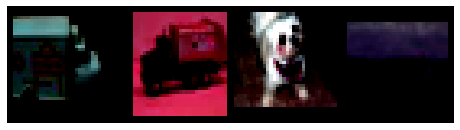

In [26]:
# Example: Display a random image from CIFAR-10 dataset
dataiter = iter(train_loader_cifar10)
images, labels = next(dataiter)
plt.figure(figsize=(8, 8))
plt.imshow(torchvision.utils.make_grid(images[:4]).numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.show()

# Image Dataset
An image dataset can be created by defining the class which inherits the properties of torch.utils.data.Dataset class. This class has two abstract methods which have to be present in the derived class:

__len__(): returns the number of samples present in the dataset.

__getitem__(): returns the sample at the ith index from the dataset.

# load the image dataset in Pytorch

In [16]:
# Creating a custom dataset class
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, dir, transform=None):
        self.data_dir = dir
        self.images = os.listdir(dir)
        self.transform = transform

    # Defining the length of the dataset
    def __len__(self):
        return len(self.images)

    # Defining the method to get an item from the dataset
    def __getitem__(self, index):
        image_path = os.path.join(self.data_dir, self.images[index])
        image = np.array(Image.open(image_path))

        # Applying the transform
        if self.transform:
            image = self.transform(image)

        return image


use this class on our sample dataset